In [1]:
!pip install --upgrade neural_structured_learning

In [2]:
!python -c "import neural_structured_learning as nsl"

2021-09-09 14:45:44.275589: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import tensorflow as tf
import neural_structured_learning as nsl

2021-09-09 14:45:46.355267: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0


In [4]:
# Prepare data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((28, 28), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

2021-09-09 14:45:47.980274: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-09-09 14:45:48.572966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-09 14:45:48.573538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-09 14:45:48.573586: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0
2021-09-09 14:45:48.576710: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.11
2021-09-09 14:45:48.578704: I tensorflow/stream_executor/platform/default/d

In [6]:
# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

In [7]:
adv_model

In [8]:
# Compile, train, and evaluate.
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=5)
model.evaluate(x_test,  y_test)

Epoch 1/5


2021-09-09 14:45:49.683421: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.11


1875/1875 [==============================] - 3s 1ms/step - loss: 0.2547 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1128 - accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9789


[0.0739424079656601, 0.9789000153541565]

In [10]:
# Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': x_test, 'label': y_test})

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - sparse_categorical_crossentropy: 0.0370 - sparse_categorical_accuracy: 0.9884 - scaled_adversarial_loss: 0.0103
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - sparse_categorical_crossentropy: 0.0282 - sparse_categorical_accuracy: 0.9914 - scaled_adversarial_loss: 0.0081
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - sparse_categorical_crossentropy: 0.0230 - sparse_categorical_accuracy: 0.9931 - scaled_adversarial_loss: 0.0069
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - sparse_categorical_crossentropy: 0.0196 - sparse_categorical_accuracy: 0.9935 - scaled_adversarial_loss: 0.0061
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0204 - sparse_categorical_crossentropy: 0.0155 - sparse_categorical_accuracy: 0.9958 - scaled_adversarial_loss: 0.0050


313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - sparse_categorical_crossentropy: 0.0703 - sparse_categorical_accuracy: 0.9790 - scaled_adversarial_loss: 0.0186


[0.08893593400716782,
 0.0703321248292923,
 0.9789999723434448,
 0.018603822216391563]

In [11]:
adv_model.evaluate({'feature': x_test, 'label': y_test})

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - sparse_categorical_crossentropy: 0.0703 - sparse_categorical_accuracy: 0.9790 - scaled_adversarial_loss: 0.0186


[0.08893593400716782,
 0.0703321248292923,
 0.9789999723434448,
 0.018603822216391563]

### Adversarial regularization for image classification

In [12]:
import matplotlib.pyplot as plt
import neural_structured_learning as nsl
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

**Hyperparameters**

In [13]:
class HParams(object):
  def __init__(self):
    self.input_shape = [28, 28, 1]
    self.num_classes = 10
    self.conv_filters = [32, 64, 64]
    self.kernel_size = (3, 3)
    self.pool_size = (2, 2)
    self.num_fc_units = [64]
    self.batch_size = 32
    self.epochs = 5
    self.adv_multiplier = 0.2
    self.adv_step_size = 0.2
    self.adv_grad_norm = 'infinity'

HPARAMS = HParams()

**MNIST dataset**

In [14]:
datasets = tfds.load('mnist')

train_dataset = datasets['train']
test_dataset = datasets['test']

IMAGE_INPUT_NAME = 'image'
LABEL_INPUT_NAME = 'label'

In [15]:
def normalize(features):
  features[IMAGE_INPUT_NAME] = tf.cast(
      features[IMAGE_INPUT_NAME], dtype=tf.float32) / 255.0
  return features

def convert_to_tuples(features):
  return features[IMAGE_INPUT_NAME], features[LABEL_INPUT_NAME]

def convert_to_dictionaries(image, label):
  return {IMAGE_INPUT_NAME: image, LABEL_INPUT_NAME: label}

train_dataset = train_dataset.map(normalize).shuffle(10000).batch(HPARAMS.batch_size).map(convert_to_tuples)
test_dataset = test_dataset.map(normalize).batch(HPARAMS.batch_size).map(convert_to_tuples)

#### Base model

In [16]:
def build_base_model(hparams):
  """Builds a model according to the architecture defined in `hparams`."""
  inputs = tf.keras.Input(
      shape=hparams.input_shape, dtype=tf.float32, name=IMAGE_INPUT_NAME)

  x = inputs
  for i, num_filters in enumerate(hparams.conv_filters):
    x = tf.keras.layers.Conv2D(
        num_filters, hparams.kernel_size, activation='relu')(
            x)
    if i < len(hparams.conv_filters) - 1:
      # max pooling between convolutional layers
      x = tf.keras.layers.MaxPooling2D(hparams.pool_size)(x)
  x = tf.keras.layers.Flatten()(x)
  for num_units in hparams.num_fc_units:
    x = tf.keras.layers.Dense(num_units, activation='relu')(x)
  pred = tf.keras.layers.Dense(hparams.num_classes, activation='softmax')(x)
  model = tf.keras.Model(inputs=inputs, outputs=pred)
  return model

In [17]:
base_model = build_base_model(HPARAMS)
base_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [18]:
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])
base_model.fit(train_dataset, epochs=HPARAMS.epochs)

Epoch 1/5


2021-09-09 14:47:45.825980: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudnn.so.8


1875/1875 [==============================] - 9s 5ms/step - loss: 0.1492 - acc: 0.9545
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0496 - acc: 0.9844
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - acc: 0.9890
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - acc: 0.9912
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - acc: 0.9940


In [19]:
results = base_model.evaluate(test_dataset)
named_results = dict(zip(base_model.metrics_names, results))
print('\naccuracy:', named_results['acc'])

313/313 [==============================] - 1s 3ms/step - loss: 0.0319 - acc: 0.9901

accuracy: 0.9901000261306763


#### Adversarial-regularized model

In [20]:
adv_config = nsl.configs.make_adv_reg_config(
    multiplier=HPARAMS.adv_multiplier,
    adv_step_size=HPARAMS.adv_step_size,
    adv_grad_norm=HPARAMS.adv_grad_norm
)

In [21]:
base_adv_model = build_base_model(HPARAMS)
adv_model = nsl.keras.AdversarialRegularization(
    base_adv_model,
    label_keys=[LABEL_INPUT_NAME],
    adv_config=adv_config
)

train_set_for_adv_model = train_dataset.map(convert_to_dictionaries)
test_set_for_adv_model = test_dataset.map(convert_to_dictionaries)

In [22]:
adv_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])
adv_model.fit(train_set_for_adv_model, epochs=HPARAMS.epochs)

Epoch 1/5


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2909 - sparse_categorical_crossentropy: 0.1354 - sparse_categorical_accuracy: 0.9582 - scaled_adversarial_loss: 0.1555
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1139 - sparse_categorical_crossentropy: 0.0395 - sparse_categorical_accuracy: 0.9878 - scaled_adversarial_loss: 0.0745
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0806 - sparse_categorical_crossentropy: 0.0300 - sparse_categorical_accuracy: 0.9907 - scaled_adversarial_loss: 0.0506
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0578 - sparse_categorical_crossentropy: 0.0231 - sparse_categorical_accuracy: 0.9928 - scaled_adversarial_loss: 0.0347
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0444 - sparse_categorical_crossentropy: 0.0198 - sparse_categorical_accuracy: 0.9941 - scaled_adversarial_loss: 0.0246


In [23]:
results = adv_model.evaluate(test_set_for_adv_model)
named_results = dict(zip(adv_model.metrics_names, results))
print('\naccuracy:', named_results['sparse_categorical_accuracy'])

313/313 [==============================] - 1s 3ms/step - loss: 0.0653 - sparse_categorical_crossentropy: 0.0312 - sparse_categorical_accuracy: 0.9911 - scaled_adversarial_loss: 0.0341

accuracy: 0.991100013256073


In [24]:
reference_model = nsl.keras.AdversarialRegularization(
    base_model,
    label_keys=[LABEL_INPUT_NAME],
    adv_config=adv_config)
reference_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])

In [25]:
models_to_eval = {
    'base': base_model,
    'adv-regularized': adv_model.base_model
}
metrics = {
    name: tf.keras.metrics.SparseCategoricalAccuracy()
    for name in models_to_eval.keys()
}

In [26]:
perturbed_images, labels, predictions = [], [], []

for batch in test_set_for_adv_model:
  perturbed_batch = reference_model.perturb_on_batch(batch)
  # Clipping makes perturbed examples have the same range as regular ones.
  perturbed_batch[IMAGE_INPUT_NAME] = tf.clip_by_value(                          
      perturbed_batch[IMAGE_INPUT_NAME], 0.0, 1.0)
  y_true = perturbed_batch.pop(LABEL_INPUT_NAME)
  perturbed_images.append(perturbed_batch[IMAGE_INPUT_NAME].numpy())
  labels.append(y_true.numpy())
  predictions.append({})
  for name, model in models_to_eval.items():
    y_pred = model(perturbed_batch)
    metrics[name](y_true, y_pred)
    predictions[-1][name] = tf.argmax(y_pred, axis=-1).numpy()

for name, metric in metrics.items():
  print('%s model accuracy: %f' % (name, metric.result().numpy()))

base model accuracy: 0.530400
adv-regularized model accuracy: 0.934500


accuracy in batch 0:
base model: 16 / 32
adv-regularized model: 29 / 32


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


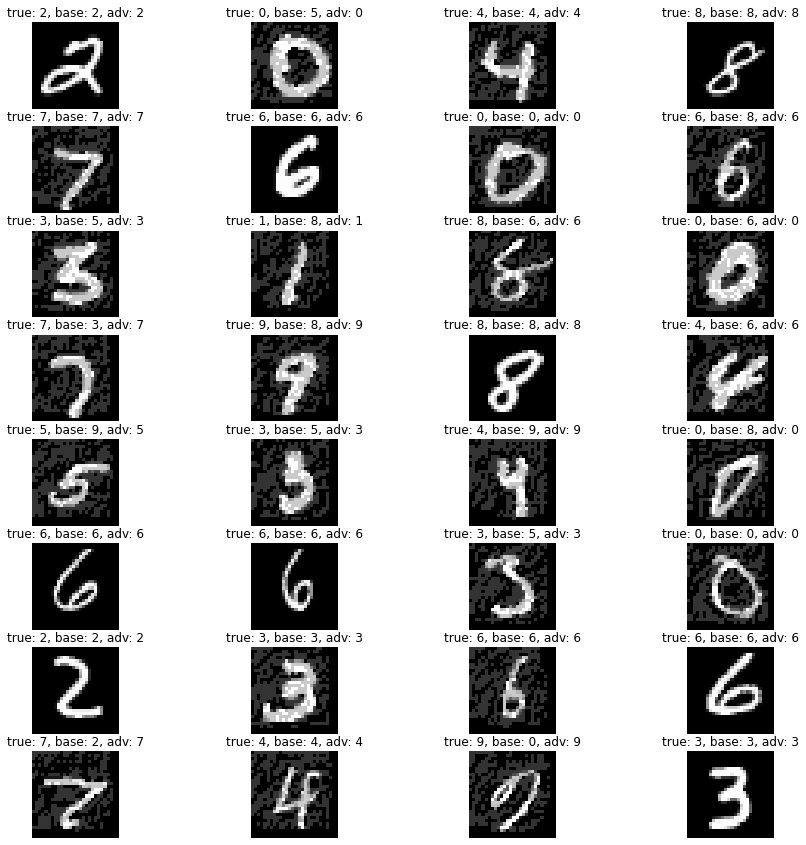

In [28]:
batch_index = 0

batch_image = perturbed_images[batch_index]
batch_label = labels[batch_index]
batch_pred = predictions[batch_index]

batch_size = HPARAMS.batch_size
n_col = 4
n_row = (batch_size + n_col - 1) / n_col

print('accuracy in batch %d:' % batch_index)
for name, pred in batch_pred.items():
  print('%s model: %d / %d' % (name, np.sum(batch_label == pred), batch_size))

plt.figure(figsize=(15, 15))
for i, (image, y) in enumerate(zip(batch_image, batch_label)):
  y_base = batch_pred['base'][i]
  y_adv = batch_pred['adv-regularized'][i]
  plt.subplot(n_row, n_col, i+1)
  plt.title('true: %d, base: %d, adv: %d' % (y, y_base, y_adv))
  plt.imshow(tf.keras.preprocessing.image.array_to_img(image), cmap='gray')
  plt.axis('off')

plt.show()